In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from warnings import filterwarnings

from sklearn.cluster import \
    KMeans, \
    AgglomerativeClustering, \
    DBSCAN
from scipy.cluster.hierarchy import dendrogram
import sklearn.datasets as datasets

In [ ]:
filterwarnings('ignore', category=FutureWarning)
sns.set(style='white', font_scale=1.5)
matplotlib.rcParams['image.cmap'] = 'rainbow'
random_state = 1

# Методы кластеризации

## 1. K-Means
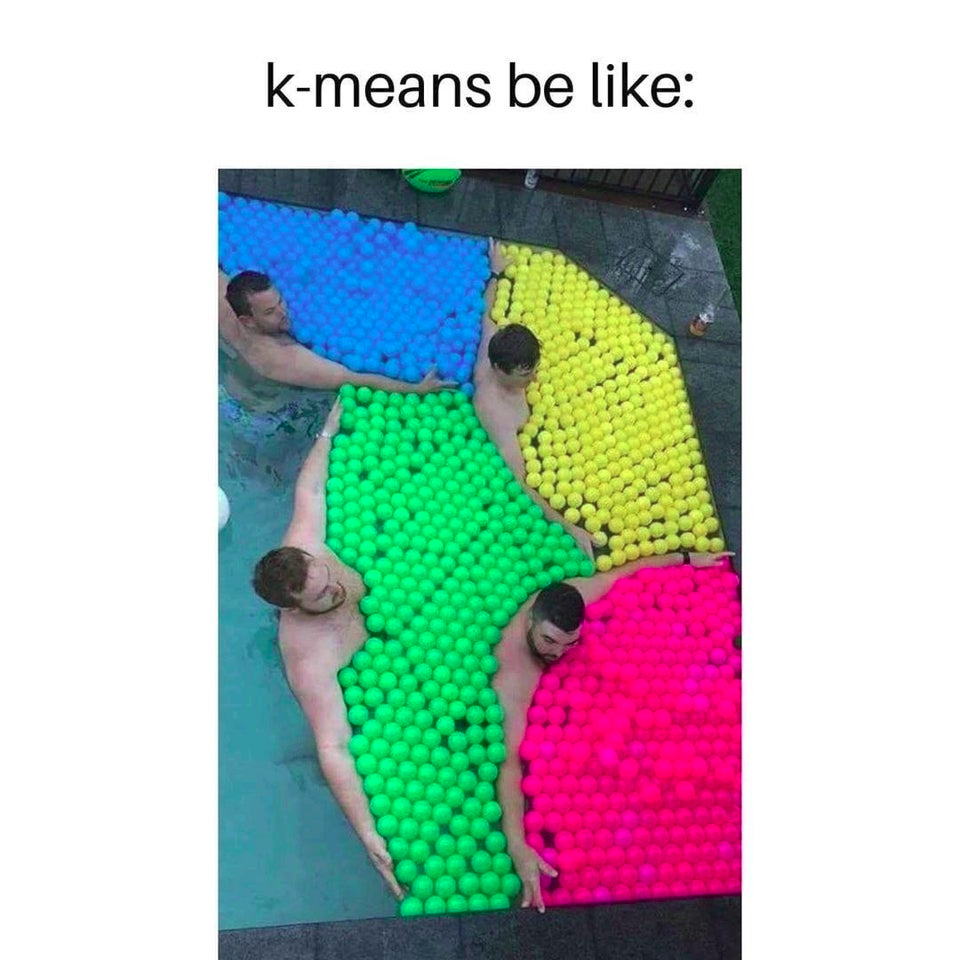

**K-Means из Sklearn**  
`KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')`  

 * *Самый важный параметр*  
* `n_clusters` &mdash; число кластеров.

 * *Наиболее важные остальные параметры*   
* `init` &mdash; метод для начального определения центров кластеров. По дефолту используется 'k-means++'. Подробнее про этот метод можно найти [здесь](https://ru.wikipedia.org/wiki/K-means%2B%2B).   
* `n_init` &mdash; количество запусков K-Means из различных начальных приближений.
* `max_iter` &mdash; максимальное количество итераций.  
* `tol`  &mdash; максимальное  относительное отличие в метрике, при котором можно сказать, что метод сошелся. 
* `verbose` &mdash; позволяет отображать работу метода на промежуточных шагах с определенной переодичностью. Может пригодится работы с очень большими данными.  
* `random_state` &mdash; позволяет зафиксировать случайность.  
* `n_jobs` &mdash; позволяет распараллелить вычисления на `n_jobs` задач. Может пригодится работы с очень большими данными.  

 * *Наиболее важные атрибуты*  
* `cluster_centers_` &mdash; центры кластеров.  
* `labels_` &mdash; метки для данных.
* `inertia_` &mdash; расстояния от точек до центров кластеров.

 * *Методы*  
* `fit(self, X[, y, sample_weight])`  
* `fit_predict(self, X[, y, sample_weight])`  
* `fit_transform(self, X[, y, sample_weight])`  
* `predict(self, X[, sample_weight])`  
* `transform(self, X)`  

Примечание  
`transform` преобразует точки выборки в протранство расстояний от центров кластеров.

Сгенирируем искуственный датасет с 4 кластерами.

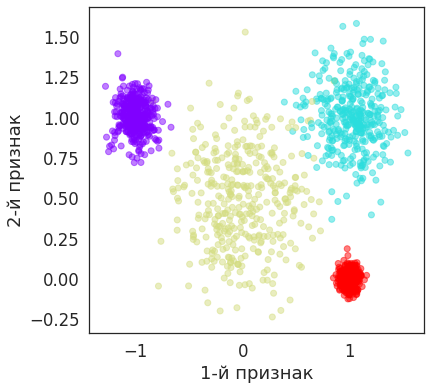

In [ ]:
n_samples = 1500

# Генерация данных
X_blobs, y_blobs = datasets.make_blobs(
    n_samples=n_samples, 
    centers=[[-1, 1], [1, 1], [0, 0.5], [1, 0]],
    cluster_std=[0.1, 0.2, 0.3, 0.05],
    random_state=random_state,
)

# Визуализация
fig = plt.figure(figsize=(6, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, alpha=0.5)
plt.xlabel('1-й признак')
plt.ylabel('2-й признак');

Вспоним, как работает k-means по шагам.

Будем использовать собственоручно написанный k-means, так как из реализации из sklearn тяжело вытаскивать промежуточные шаги.

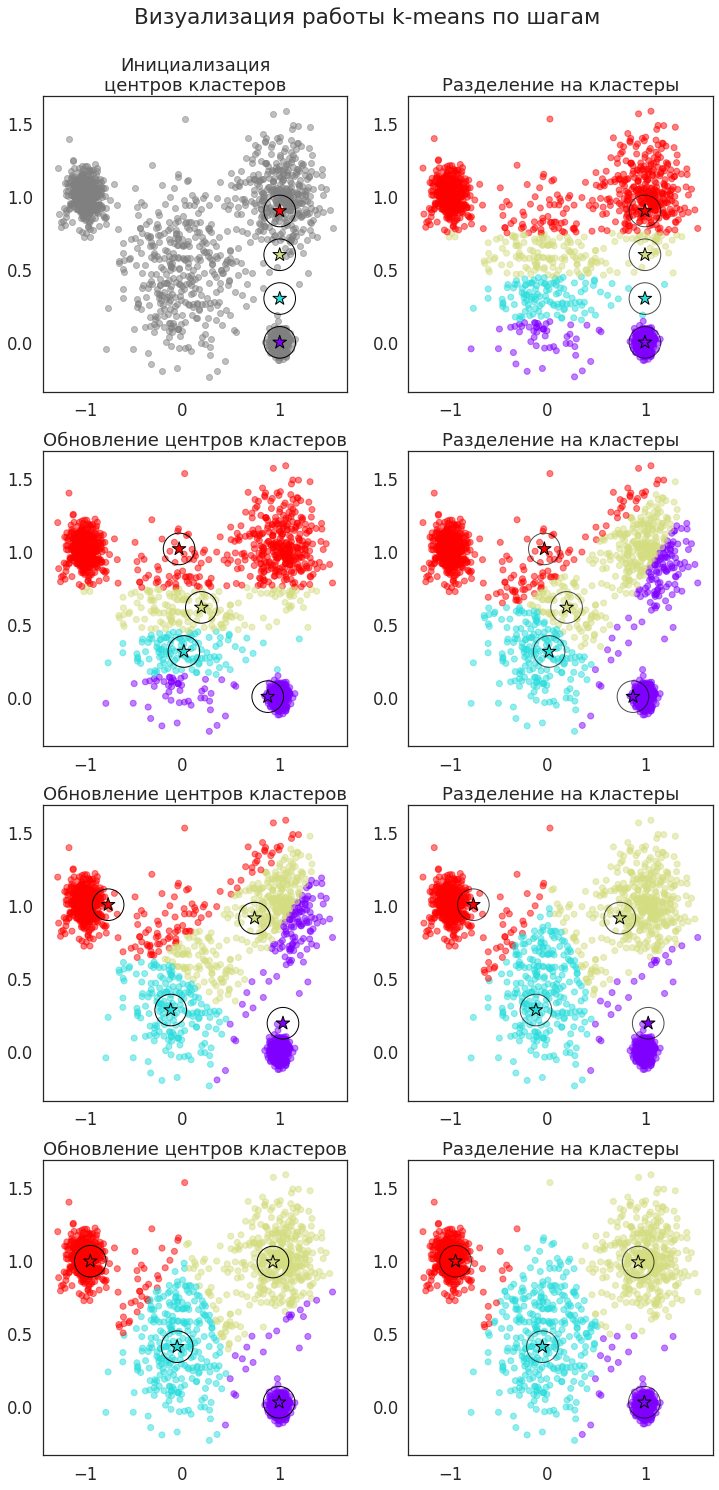

In [ ]:
fig = plt.figure(figsize=(12, 25))

# Начальные значения
centres = np.array([[1, 0.0], [1, 0.3], [1, 0.6], [1, 0.9]])
n_clusters = len(centres)
y_pred = 'gray'


for n in range(1, n_clusters+1):
    
    plt.subplot(4, 2, n * 2 - 1)
    plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred, alpha=0.5)
    plt.scatter(centres[:, 0], centres[:, 1], c=np.arange(n_clusters),
                marker='*', s=200, label='центры кластеров', edgecolors='black')
    plt.scatter(centres[:, 0], centres[:, 1],
                label='центры кластеров', s=1000, edgecolors='black',
                facecolor='none', linewidths=1)
    
    if n == 1:
        plt.title('Инициализация\nцентров кластеров')
    else:
        plt.title('Обновление центров кластеров')

    # Предсказание
    y_pred = np.argmin([np.sum((X_blobs - centres[j])**2, axis=1) for j in range(n_clusters)], axis=0)
    
    plt.subplot(4, 2, n * 2)
    plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred, alpha=0.5)
    plt.scatter(centres[:, 0], centres[:, 1], c=np.arange(n_clusters),
                marker='*', s=200, label='центры кластеров', edgecolors='black')
    plt.scatter(centres[:, 0], centres[:, 1],
                label='центры кластеров', alpha=0.7, s=1000, edgecolors='black',
                facecolor='none', linewidths=1)
    plt.title('Разделение на кластеры')
    
    # Переопределение центров кластеров
    centres = np.array(list(np.mean(X_blobs[[y_pred == j]], axis=0) for j in range(n_clusters)))

fig.suptitle('Визуализация работы k-means по шагам', y=0.93);

Больше примеров визуализации работы k-means можно найти [здесь](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

Поробуем применить k-means для разного числа кластеров.

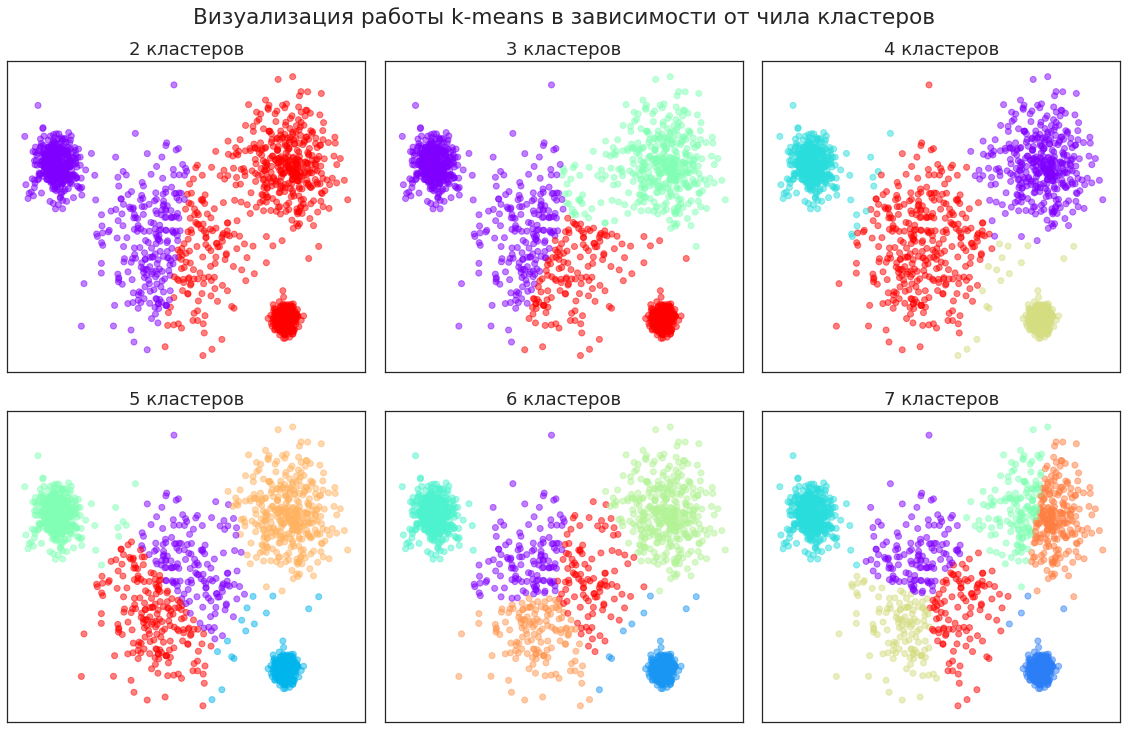

In [ ]:
fig = plt.figure(figsize=(16, 10))

for n in range(2, 8):
    # Предсказание
    kmeans = KMeans(n_clusters=n, random_state=random_state)
    kmeans.fit(X_blobs)
    y_pred = kmeans.predict(X_blobs)
    
    # Визуализация
    plt.subplot(2, 3, n - 1)
    plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred, alpha=0.5)
    plt.title(f'{n} кластеров')
    plt.xticks([]), plt.yticks([])
    
fig.suptitle('Визуализация работы k-means в зависимости от чила кластеров', y=1.02)
plt.tight_layout()

## 2. DBSCAN

[**DBSCAN из Sklearn**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)  
`DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)`  

 * *Самые важные параметры*  
* `eps` &mdash; максимальное расстояние между двумя точками, которые можно считать соседями.  
* `min_samples` &mdash; минимальное количество соседних точек, определяющих эту группу точек как внутренние.  

 * *Наиболее важные остальные параметры*  
* `algorithm` &mdash; метод для поиска ближайших соседей.  
* `n_jobs` &mdash; позволяет распараллелить вычисления на `n_jobs` задач. Может пригодится работы с очень большими данными.  

 * *Наиболее важные атрибуты*
* `core_sample_indices_` &mdash; индексы внтуренних точек, определенных методом.
* `labels_` &mdash; лейблы точек, соответствующие предсказанным кластерам.

 * *Методы*  
* `fit(self, X[, y, sample_weight])`  
* `fit_predict(self, X[, y, sample_weight])`

*Примечание*  
Выбросы, детектированные методом, имеют лейбл -1.

Вспомним, как работает метод. 

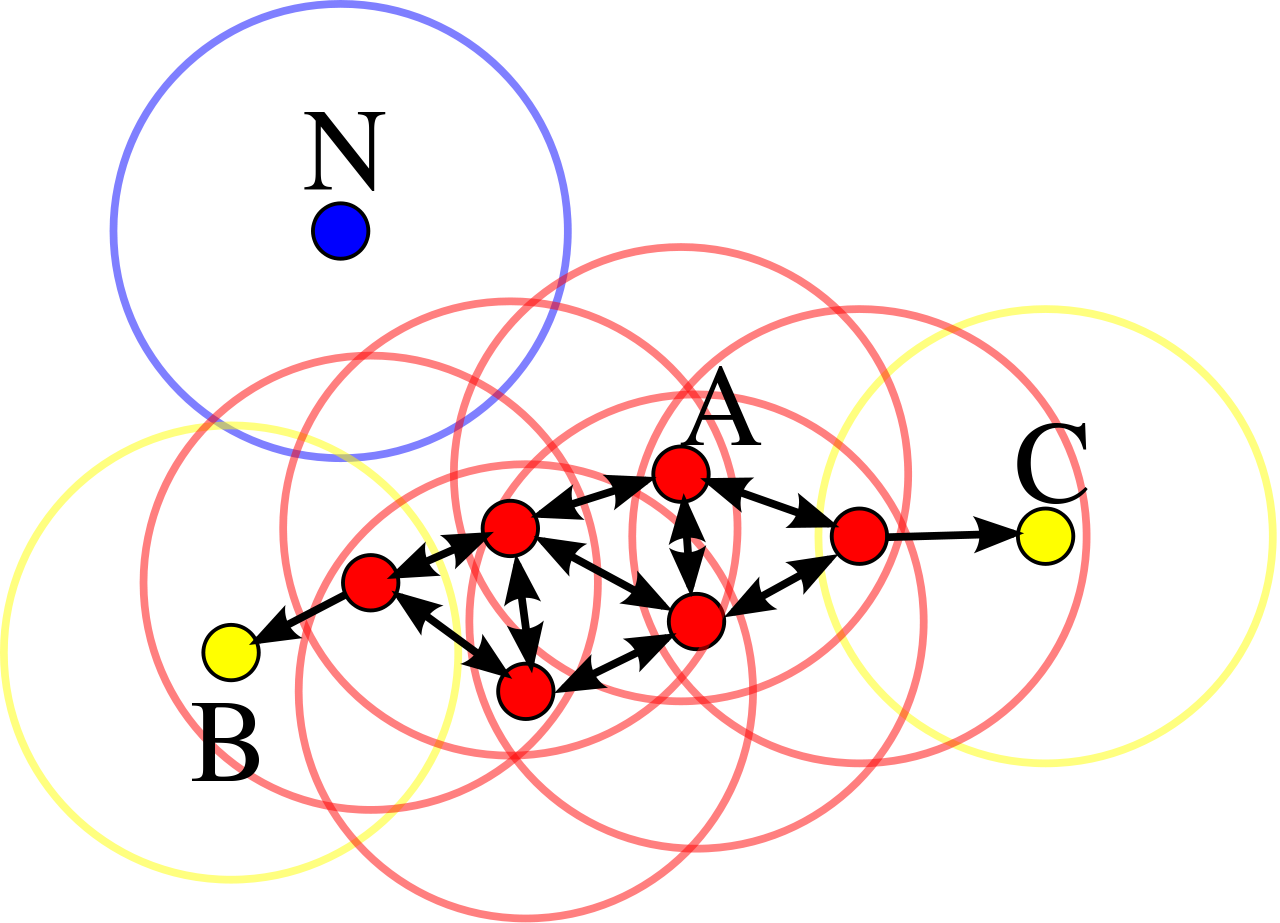

   * Красные точки &mdash; внутренние.  


   * Желтые точки &mdash; граничные.  


   * Синие точки &mdash; выбросы.  


Интерактивные примеры визуализации работы DBSCAN [здесь](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/).

Применим DBSCAN к нашим данным и визуализируем кластеризацию. На графике крупные точки являются внутренними, небольшие точки --- граничные, черные --- выбросы. Метод определил в данных 4 кластера и некоторое количество выбросов.

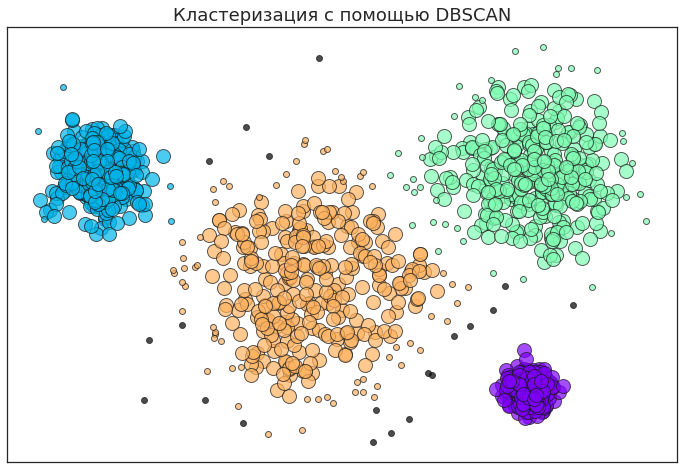

In [ ]:


db = DBSCAN(eps=0.2, min_samples=25).fit(X_blobs)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

plt.figure(figsize=(12, 8))

colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(set(labels)))]
for k, col in zip(set(labels), colors):
    
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_blobs[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14, alpha=0.7)

    xy = X_blobs[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, alpha=0.7)
    
plt.title('Кластеризация с помощью DBSCAN')
plt.xticks([]), plt.yticks([])
plt.show()

Посмотрим, как меняется результат кластеризации в зависимости от параметров $\varepsilon=$ `eps` и $m=$ `min_samples`.

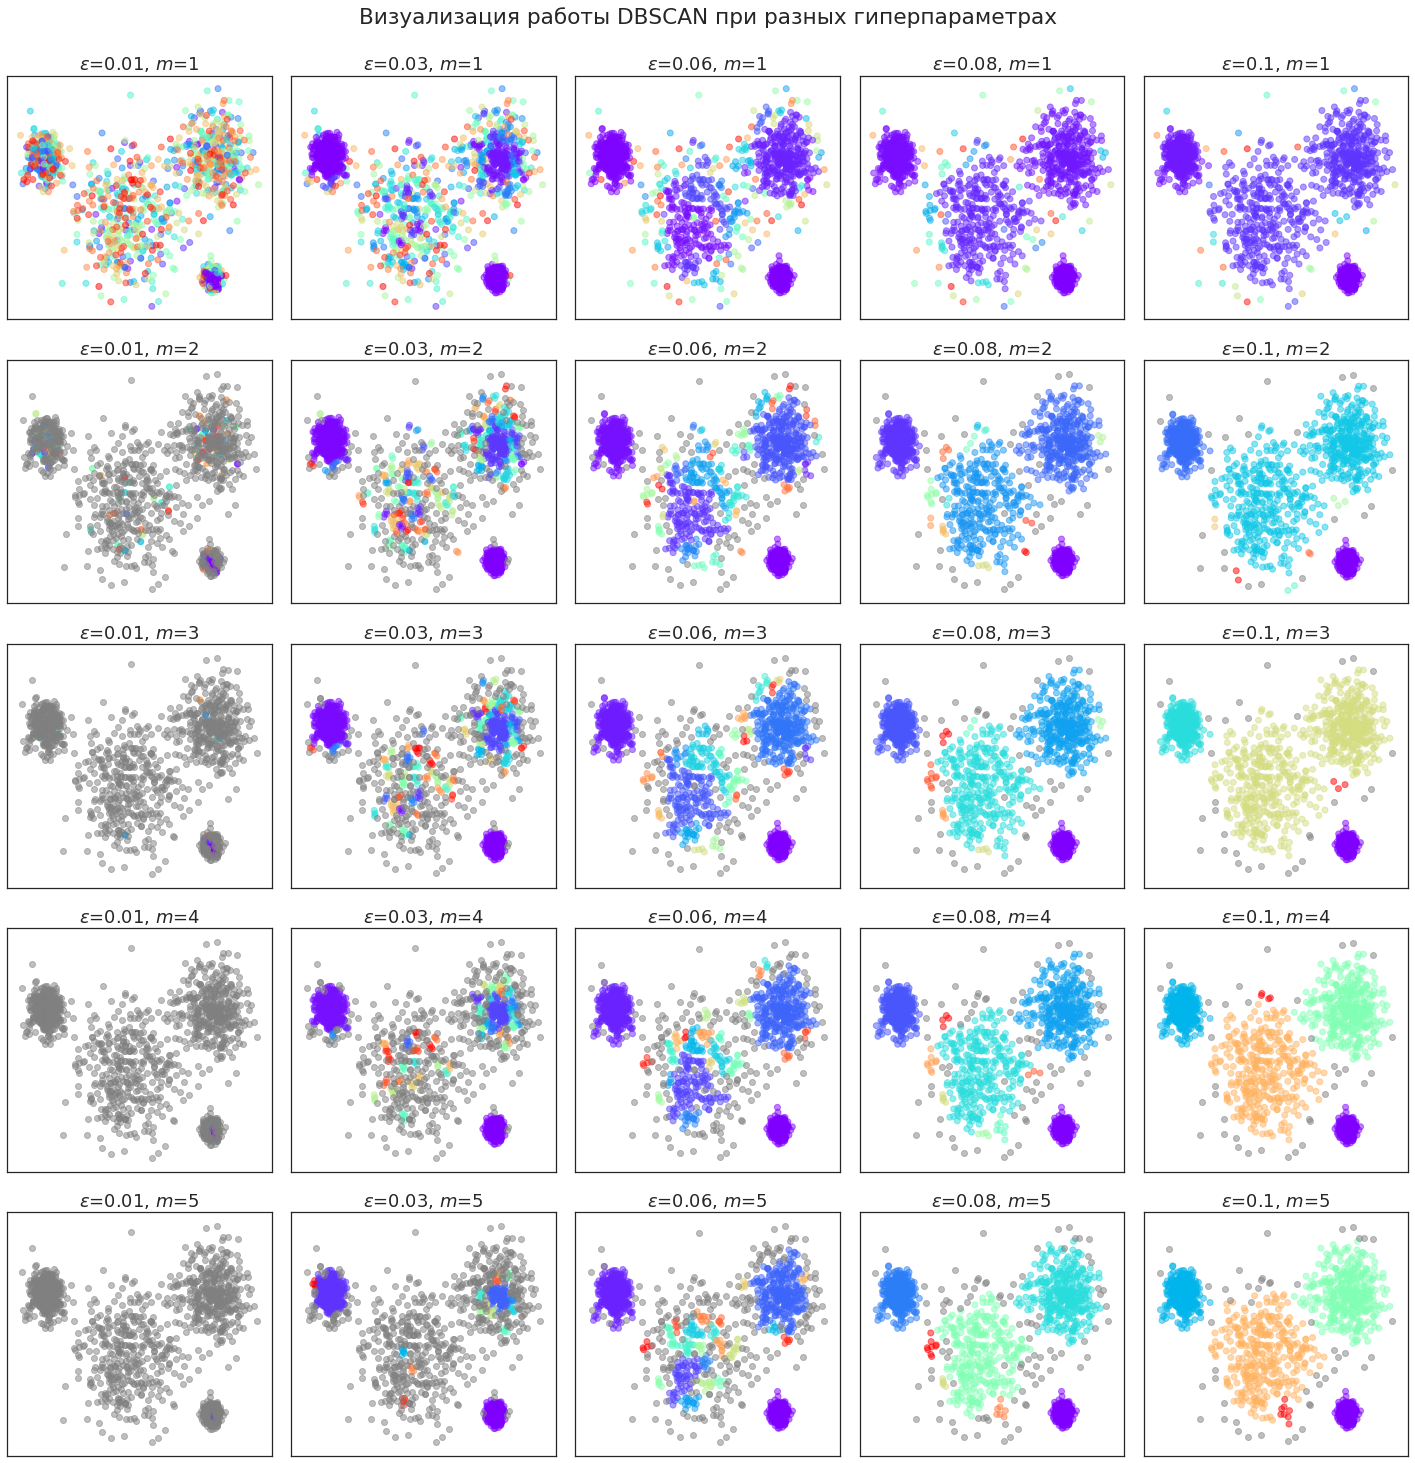

In [ ]:
# Сетка параметров
eps, min_samples = np.meshgrid(
    np.linspace(0.01, 0.1, 5), np.arange(1, 6))

fig = plt.figure(figsize=(20, 20))
for i in range(5):
    for j in range(5):
        
        # Применение метода
        dbscan = DBSCAN(eps[i, j], min_samples[i, j])
        y_pred = dbscan.fit_predict(X_blobs)
        outliers = (y_pred == -1)
        
        # Визуализация
        plt.subplot(5, 5, i * 5 + j + 1)
        plt.scatter(X_blobs[~outliers, 0], X_blobs[~outliers, 1], 
                    c=y_pred[~outliers], alpha=0.5)
        plt.scatter(X_blobs[outliers, 0], X_blobs[outliers, 1], 
                    c='gray', alpha=0.5)
        plt.title(
            f'$\\varepsilon$={np.round(eps[i, j], 2)}, $m$={min_samples[i, j]}')
        
        plt.xticks([]), plt.yticks([])
        
fig.suptitle('Визуализация работы DBSCAN при разных гиперпараметрах', y=1.02)
plt.tight_layout()

## 3. Агломеративная кластеризация

[**AgglomerativeClustering из Sklearn**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)  
`AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)`  

 * *Самый важный признак*  
* `n_clusters` &mdash; количество кластеров. Этот параметр должен быть равен `None`, если задан параметр `distance_threshold`.  


 * *Остальные важные признаки*
* `affinity` &mdash; метрика для подсчета рассояния между точками.
* `linkage` &mdash; критерий связи множеств.
* `compute_full_tree` &mdash; отвечает за то, чтобы метод подсчитвал все дерево или нет. Это параметр может быть важен в случае, когда данных очень много и количество кластеров большое. В таком случае может быть стоит считать не все дерево полностью.
* `distance_threshold` &mdash; порог расстояния между кластерами, выше которого кластеры не могут быть объединены. Если этот параметр не равен `None`, то `n_clusters` должен быть равен `None` и `compute_full_tree` равен `True`. 


 * *Важные атрибуты*  
* `labels_` &mdash; лейблы точек (результат кластеризации)
* `children_` &mdash; дети каждой нелистовой вершины в дереве в порядке номеров вершин. Все листовые вершины соотвествуют объектам выборки и имеют номера < `n_samples`. Все остальные вершины имеют номера >= `n_samples`. Корень дерева имеет наибольший номер.  


 * *Методы*  
* `fit`  
* `fit_predict`  

Построим дерево и визуализируем его

In [ ]:
agglomerat = AgglomerativeClustering(n_clusters=4)
agglomerat.fit(X_blobs)
# Дети для каждой нелистовой вершины. 
# Вершины заданы в порядке построения дерева.
children  = agglomerat.children_
# Расстояние от нижнего уровня до каждой нелистовой вершины 
# (только для визуализации дерева)
distance = np.arange(children.shape[0])
# Количество точек содержащееся в поддереве каждой нелистовой вершины.
n_dots = np.arange(2, children.shape[0] + 2)
linkage_matrix = np.column_stack(
    [children, np.exp(distance / 50), n_dots]).astype(float)

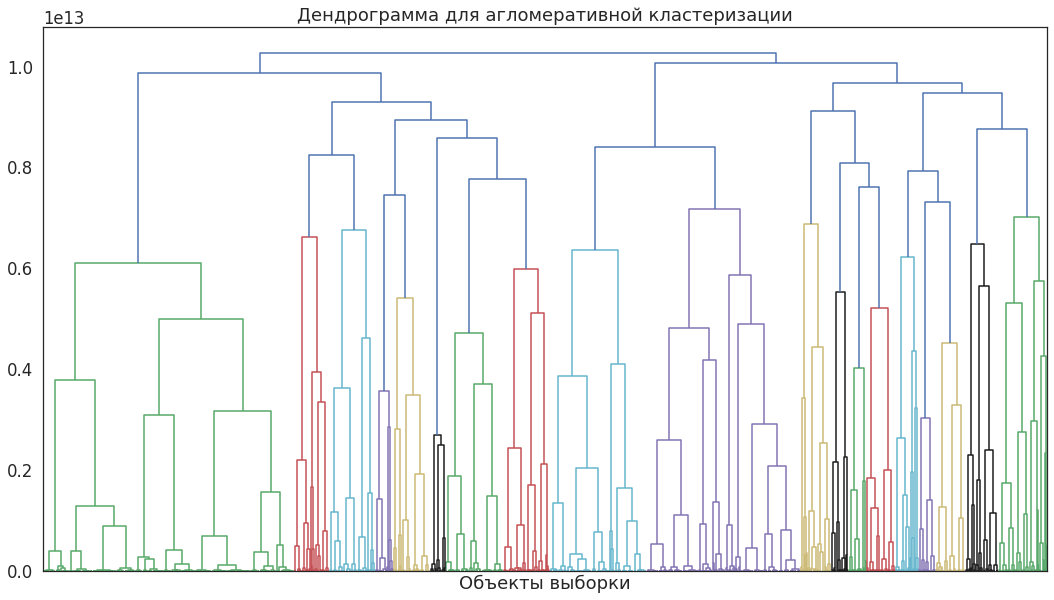

In [ ]:
plt.figure(figsize=(18, 10))
dendrogram(linkage_matrix, labels=agglomerat.labels_, 
           no_labels=True,
          )
plt.title('Дендрограмма для агломеративной кластеризации')
plt.xlabel('Объекты выборки');

Посмотрим на результат кластеризации

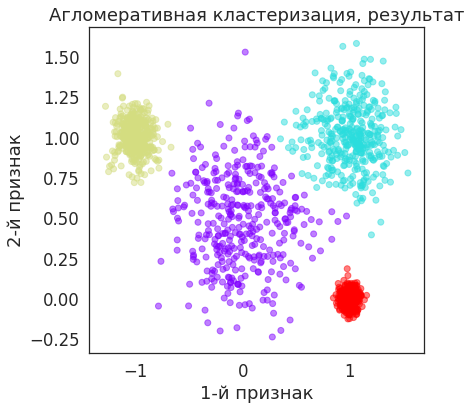

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=agglomerat.labels_, alpha=0.5)
plt.title('Агломеративная кластеризация, результат')
plt.xlabel('1-й признак')
plt.ylabel('2-й признак');

Посмотрим на то, какие получаются результаты при различном количестве кластеров.

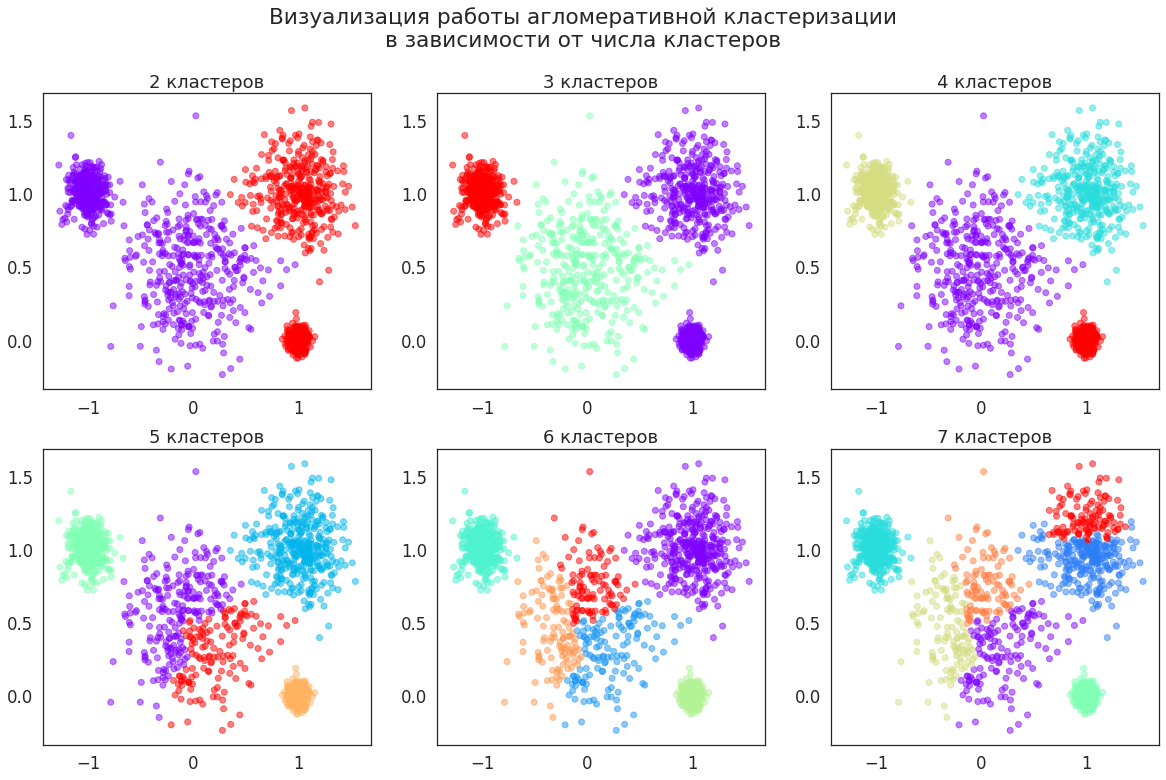

In [ ]:
fig = plt.figure(figsize=(20, 12))

for n in range(2, 8):
    # Предсказание
    agglomerat = AgglomerativeClustering(n_clusters=n)
    y_pred = agglomerat.fit_predict(X_blobs)
    # Визуализация
    plt.subplot(2, 3, n - 1)
    plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_pred, alpha=0.5)
    plt.title(f'{n} кластеров')

fig.suptitle('Визуализация работы агломеративной кластеризации\nв зависимости от чиcла кластеров');

Посмотри на результаты, которые получаются при использовании различных критериев связи кластеров.
* `ward` минимизирует дисперсию внутри множества, полученного при объединении 2 других множеств. Тогда соединяются два множества с наименьшей дисперсией. 
* `average` использует среднее расстояние между точками в 2 множествах. Тогда соединяются множества с наименьшим средним расстоянием.
* `complete` использует максимальное расстояние между точками в 2 множествах. Тогда соединяются множества с наименьшим максимальным расстоянием.
* `single` использует минимальное расстояние между точками в 2 множествах. Тгда соединятся множества с с наименьшим минимальным расстоянием.

In [ ]:
# Новые датасеты
X_noisy_circles, _ = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
X_no_structure = np.random.rand(n_samples, 2,)
X, _ = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

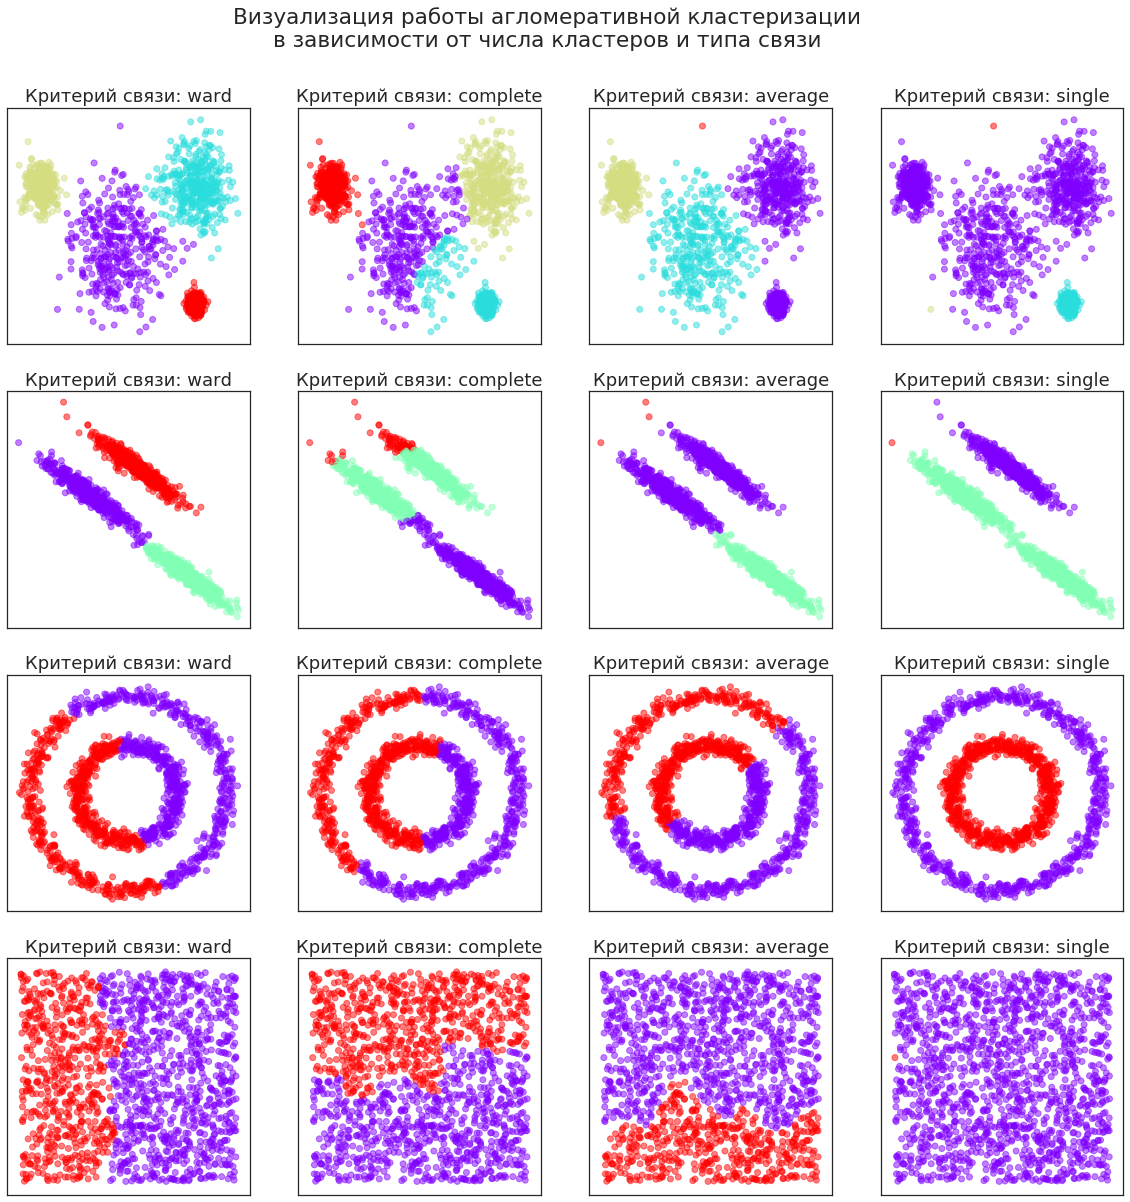

In [ ]:
fig = plt.figure(figsize=(20, 20))
for i, (dataset, n) in enumerate(zip(
    [X_blobs, X_aniso, X_noisy_circles, X_no_structure],
    [4, 3, 2, 2]
)):
    for j, linkage in enumerate(["ward", "complete", "average", "single"]):
        
        # Предсказание
        agglomerat = AgglomerativeClustering(n_clusters=n, linkage=linkage)
        y_pred = agglomerat.fit_predict(dataset)
        
        # Визуализация
        plt.subplot(4, 4, i * 4 + j  + 1)
        plt.scatter(dataset[:, 0], dataset[:, 1], c=y_pred, alpha=0.5)
        plt.title(f'Критерий связи: {linkage}')
        plt.xticks([]), plt.yticks([])

fig.suptitle('Визуализация работы агломеративной кластеризации\nв зависимости от чиcла кластеров и типа связи', y=0.95);

## 4. Сравнение работы методов

Возьмем некоторое количество искусственных данных и сравним работу методов

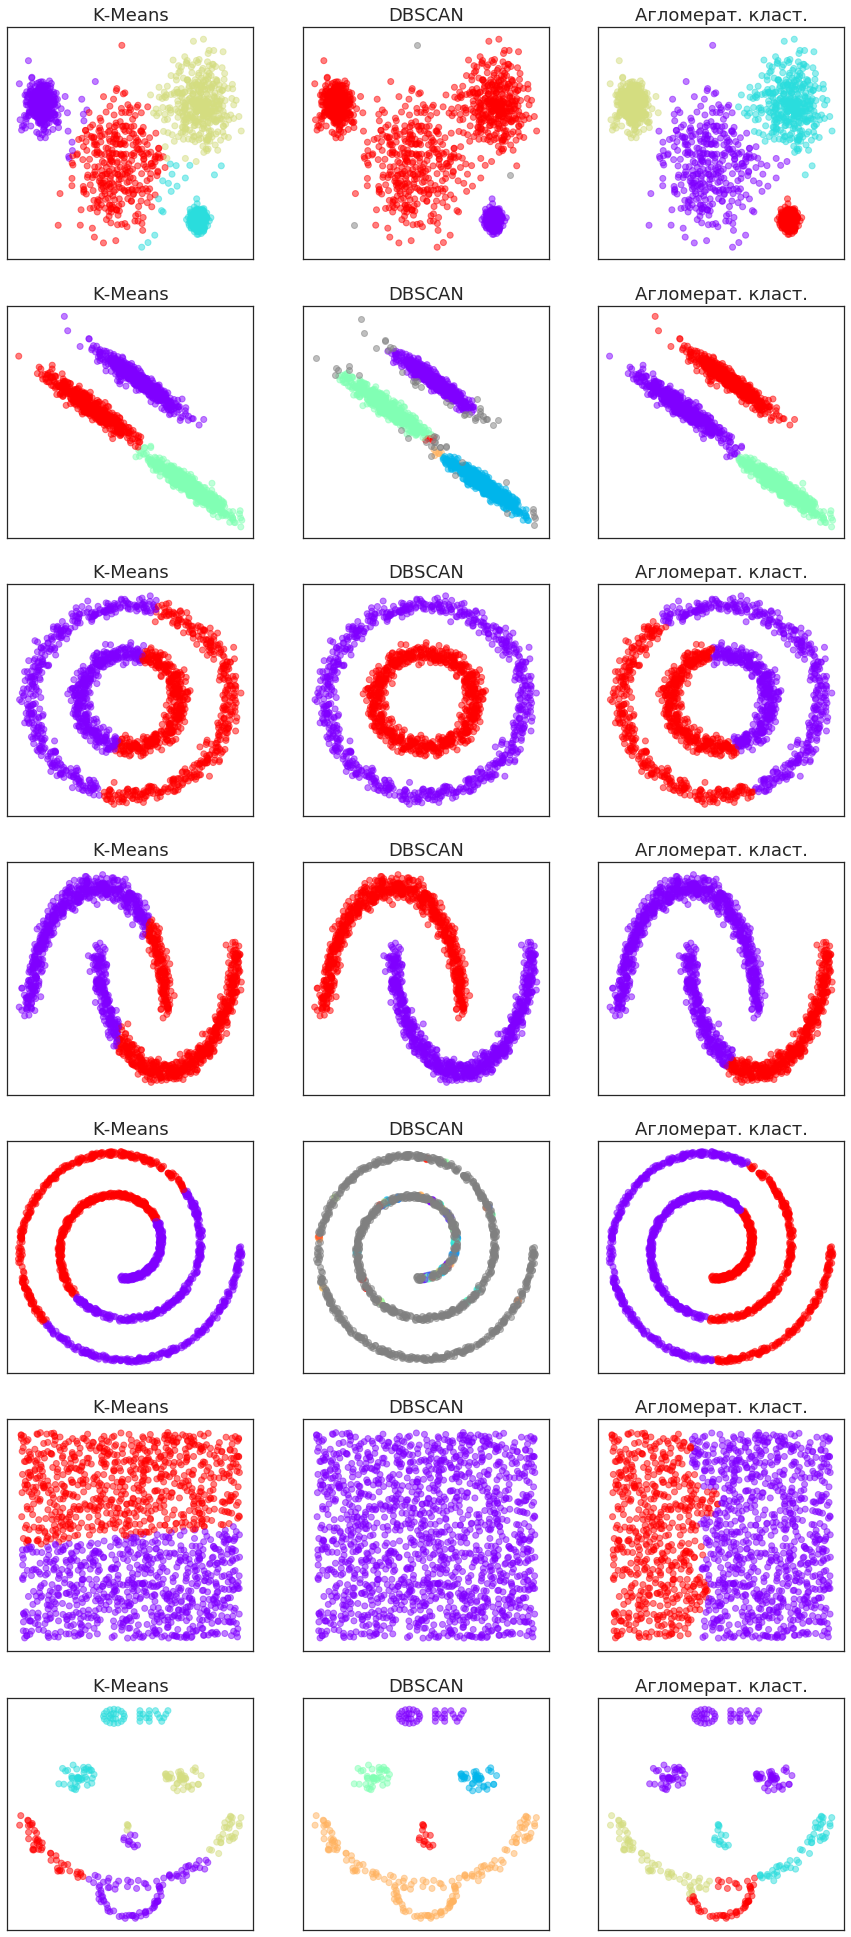

In [ ]:
# Е
X_smile = np.loadtxt('task.txt')
X_noisy_moons, _ = datasets.make_moons(n_samples=n_samples, noise=.05)
t = 1.5 * np.pi * (1 + 3 * sps.uniform.rvs(size=(1, n_samples)))
x = t * np.cos(t)
y = t * np.sin(t)
X = np.concatenate((x, y))
X += .7 * sps.uniform.rvs(size=(2, n_samples))
X_loop = X.T

all_datasets = [
    X_blobs,
    X_aniso,
    X_noisy_circles,
    X_noisy_moons,
    X_loop,
    X_no_structure,
    X_smile
]

plt.figure(figsize=(15, 35))
for i, (dataset, n, eps) in enumerate(zip(
    all_datasets, 
    [4, 3, 2, 2, 2, 2, 4],
    [0.1] + [0.2]  * 6,
)):
    
    # k-means
    kmeans = KMeans(n_clusters=n)
    y_pred = kmeans.fit_predict(dataset)
    
    plt.subplot(7, 3, i * 3 + 1)
    plt.scatter(dataset[:, 0], dataset[:, 1], c=y_pred, alpha=0.5)
    plt.title('K-Means')
    plt.xticks([]), plt.yticks([])
    
    # DBSCAN
    dbscan = DBSCAN(eps=0.2, min_samples=5)
    y_pred = dbscan.fit_predict(dataset)
    outliers = (y_pred == -1)
    
    plt.subplot(7, 3, i * 3 + 2)
    plt.scatter(dataset[~outliers, 0], dataset[~outliers, 1], 
                c=y_pred[~outliers], alpha=0.5)
    plt.scatter(dataset[outliers, 0], dataset[outliers, 1], 
                c='gray', alpha=0.5)
    plt.title('DBSCAN')
    plt.xticks([]), plt.yticks([])
    
    # Agglomerative cl.
    agglomerat = AgglomerativeClustering(n_clusters=n)
    y_pred = agglomerat.fit_predict(dataset)
    
    plt.subplot(7, 3, i * 3 + 3)
    plt.scatter(dataset[:, 0], dataset[:, 1], c=y_pred, alpha=0.5)
    plt.title('Агломерат. класт.')
    plt.xticks([]), plt.yticks([])